# <center> Початковий аналіз даних з Pandas</center>
## <center>Практичне завдання. Аналіз даних пасажирів "Титаніка"</center>

**Заповніть код в клітинках і дайте відповідь на питання**

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

**Зчитаємо дані з файла в память у вигляді об'єкта Pandas.DataFrame**

In [5]:
data = pd.read_csv('data/titanic_train.csv',
                  index_col='PassengerId')

**Дані представлені у вигляді таблиці. Подивимось на перші 5 рядків:**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для прикладу відберемо пасажирів, які сіли в Cherbourg (Embarked=C) і заплатили більше 200 у.е. за квиток (fare > 200).**

Переконайтесь, що Ви розумієте, як ця конструкція працює. <br>
Якщо ні – подивіться, як вичисляється вираз в квадратних душках.

In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можна відсортувати цих людей по спаданню плати за квиток.**

In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Приклад створення признака.**

In [7]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]

In [10]:
data['Age_category'] = age_categories

**Другий спосіб – через `apply`.**

In [11]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Скільки чоловіків / жінок находилось на борту?**
- 412 чоловіків і 479 жінок
- 314 чоловіків і 577 жінок
- 479 чоловіків і 412 жінок
- 577 чоловіків і 314 жінок

In [12]:
# Ваш код тут
print('Males were',len(data[data['Sex']=='male']),', females were',len(data['Sex'])-len(data[data['Sex']=='male']),'\n')


Males were 577 , females were 314 



**2. Виведіть розподіл змінної `Pclass` (соціально-економічний статус) і цей ж розподіл, тільки для чоловіків / жінок окремо. Скільки було чоловіків в 2-гому класі?**
- 104
- 108
- 112
- 125

In [30]:
# Ваш код тут
for i in data['Pclass'].unique():
    amount_in_class = len(data[data['Pclass']==i])
    amount_in_class_men = len(data[data['Pclass']==i][data['Sex']=='male'])
    print('There were',amount_in_class ,' in class',i)
    print('Men were',amount_in_class_men,'women were',amount_in_class-amount_in_class_men)

There were 491  in class 3
Men were 347 women were 144
There were 216  in class 1
Men were 122 women were 94
There were 184  in class 2
Men were 108 women were 76
<ipython-input-30-aab7937ad126>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amount_in_class_men = len(data[data['Pclass']==i][data['Sex']=='male'])
<ipython-input-30-aab7937ad126>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amount_in_class_men = len(data[data['Pclass']==i][data['Sex']=='male'])
<ipython-input-30-aab7937ad126>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amount_in_class_men = len(data[data['Pclass']==i][data['Sex']=='male'])


**3. Які медіана і стандартне відхилення платежів (`Fare`)? Округліть до 2 знаків після коми.**
- Медіана – 14.45, стандартне відхилення – 49.69
- Медіана – 15.1, стандартне відхилення – 12.15
- Медіана – 13.15, стандартне відхилення – 35.3
- Медіана – 17.43, стандартне відхилення – 39.1

In [33]:
# Ваш код тут
print('Median is',np.around(data['Fare'].median(),2),'standart deviation is',np.around(data['Fare'].std(),2))

Median is 14.45 standart deviation is 49.69


**4. Правда, що люди молодші 30 років виживали частіше, ніж люди старші 60 років? Які долі виживших в обох групах?**
- 22.7% серед молодих і 40.6% серед старих
- 40.6% серед молодих і 22.7% серед старих
- 35.3% серед молодих і 27.4% серед старих
- 27.4% серед молодих і 35.3% серед старих

In [54]:
# Ваш код тут

young_survivior =   data[(data['Age'] < 30) & (data['Survived']==1)].shape[0]
young = data[(data['Age'] < 30)].shape[0]
old_survivior =   data[(data['Age'] > 60) & (data['Survived']==1)].shape[0]
old = data[(data['Age'] > 60)].shape[0]
print('Percentage of young survived people is',np.round(young_survivior*100/young,1),'% and for old people is ',np.round(old_survivior*100/old,1), '%')


Percentage of young survived people is 40.6 % and for old people is  22.7 %


**5. Правда, що жінки виживали частіше чоловіків? Які долі виживших в обох групах?**
- 30.2% серед чоловіків і 46.2% серед жінок
- 35.7% серед чоловіків і 74.2% серед жінок
- 21.1% серед чоловіків і 46.2% серед жінок
- 18.9% серед чоловіків і 74.2% серед жінок

In [58]:
# Ваш код тут
women_survived = data[(data['Sex']=='female') & (data['Survived']==1)].shape[0]
women = data[(data['Sex']=='female')].shape[0]
men_survived = data[(data['Sex']=='male') & (data['Survived']==1)].shape[0]
men = data[(data['Sex']=='male')].shape[0]
print(np.round(men_survived*100/men,1),'% for men and',np.round(women_survived*100/women,1),'% for women')

18.9 % for men and 74.2 % for women


**6. Найдіть найбільш популярне імя серед пасажирів Титаніка чоловічої статі?**
- Charles
- Thomas
- William
- John

In [48]:
# Ваш код тут

names_surnames = pd.Series([i.split() for i in data[data['Sex']=='male']['Name']])

names_single = pd.Series([str(i) for i in np.arange(len(names_surnames))])
names_more_than_one = pd.Series([str(i) for i in np.arange(len(names_surnames))])

for i in range(len(names_surnames)):
    for a in range(len(names_surnames[i])):
        if (names_surnames[i][a] == "Mr."):
            names_single[i] = names_surnames[i][a+1]
            break
        elif (names_surnames[i][a] == "Rev."):
            names_single[i] = names_surnames[i][a+1]
            break
        elif (names_surnames[i][a] == 'Don.'):
            names_single[i] = names_surnames[i][a+1]
            break
        elif (names_surnames[i][a] == 'Master.'):
            names_single[i] = names_surnames[i][a+1]
            break
        elif (names_surnames[i][a] == 'Dr.'):
            names_single[i] = names_surnames[i][a+1]
            break

for i in range(len(names_surnames)):
    for a in range(len(names_surnames[i])):
        if (names_surnames[i][a] == "Mr."):
            names_more_than_one[i] = ' '.join([str(elem) for elem in names_surnames[i][a+1:]]) 
            break
        elif (names_surnames[i][a] == "Rev."):
            names_more_than_one[i] = ' '.join([str(elem) for elem in names_surnames[i][a+1:]]) 
            break
        elif (names_surnames[i][a] == 'Don.'):
            names_more_than_one[i] = ' '.join([str(elem) for elem in names_surnames[i][a+1:]]) 
            break
        elif (names_surnames[i][a] == 'Master.'):
            names_more_than_one[i] = ' '.join([str(elem) for elem in names_surnames[i][a+1:]]) 
            break
        elif (names_surnames[i][a] == 'Dr.'):
            names_more_than_one[i] = ' '.join([str(elem) for elem in names_surnames[i][a+1:]]) 
            break           

print(names_single.value_counts()[:1].sort_values(ascending=False)) #взяв в якості імені наступне слово після спеціального звернення
print(names_more_than_one.value_counts()[:1].sort_values(ascending=False)) #взяв в якості імені наступне слова після спеціального звернення


William    35
dtype: int64
John    8
dtype: int64


**7. Порівняйте графічно розподіли ціни квитків і віку у врятованих і у загинувших. Середній вік загинувших вищий, вірно?**
- Так
- Ні

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

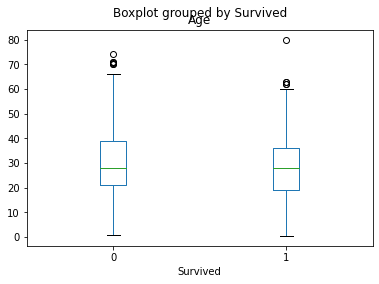

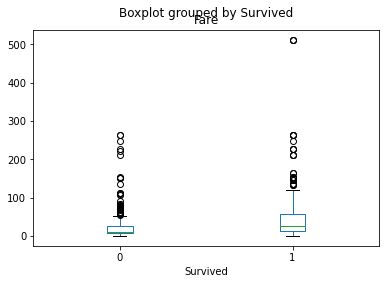

In [170]:
# Ваш код тут
data.boxplot(column =['Age'] , by = 'Survived',grid=False)
data.boxplot(column =['Fare'] , by = 'Survived',grid=False)


**8. Як відрізняються середній вік чоловіків / жінок в залежності від класа обслуговування? Виберіть правильне твердження:**
- В середньому чоловіки 1-го класу старше 40 років
- В середньому жінки 1-го класу старше 40 років
- Чоловіки всіх класів в середньому старше жінок того ж класу
- В середньому люди в 1 класі старше, ніж в 2-ому, а ті старше представників 3-го класу

In [174]:
# Ваш код тут
print('Male in firrst class had average',data[(data['Pclass']==1) & (data['Sex']=='male')]['Age'].mean())
print(data[(data['Pclass']==1) & (data['Sex']=='female')]['Age'].mean())
print(data[(data['Pclass']==2) & (data['Sex']=='male')]['Age'].mean(),data[(data['Pclass']==2) & (data['Sex']=='female')]['Age'].mean(),data[(data['Pclass']==3) & (data['Sex']=='male')]['Age'].mean(),data[(data['Pclass']==3) & (data['Sex']=='female')]['Age'].mean())
print(data[(data['Pclass']==1)]['Age'].mean(),data[(data['Pclass']==2)]['Age'].mean(),data[(data['Pclass']==3)]['Age'].mean())

Male in firrst class had average 41.28138613861386
34.61176470588235
30.74070707070707 28.722972972972972 26.507588932806325 21.75
38.233440860215055 29.87763005780347 25.14061971830986
